<a href="https://colab.research.google.com/github/aravindh698/TCSION-INTERNSHIP/blob/main/tcsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPOTHESIS GENERATION:
1. From Train DataSet it is seen that

*   The sales is Higher at 7th month
*   Second store shows maximal sale
*   The year 2017 shows a maximal sale at store 2
*   items 13,15,28,22,38,45 are soled maximally
*   Sale is higher at weekends











We need to import the needed packages 

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


We now load the data sets into two different dataframes

In [104]:
df1=pd.read_csv('/content/train.csv')
df2=pd.read_csv('/content/test.csv')

**Data Cleaning**

Cleaning means to

1.  removing the unwanted noisy data,
2.  removing NAN value

1.   dropping unwanted columns
2.   Checking the datatype and converting it to proper format





Now need to check for missing values in df1

In [105]:
df1.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

Now need to check for missing values in df2

In [106]:
df2.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

Now we check the datatype of Dataframe df1

In [107]:
df1.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Now we check the datatype of Dataframe df2

In [108]:
df2.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

We now create a copy of original data to avoid changes we make while making featrure extraction and predictions

In [109]:
train_original=df1.copy()
test_original=df2.copy()

In [110]:
df1.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [111]:
df2.columns

Index(['id', 'date', 'store', 'item'], dtype='object')

Now we check the shape of the Dataframe to be trained 

In [112]:
df1.shape

(913000, 4)

Now we check the shape of the Dataframe to be tested

In [113]:
df2.shape

(45000, 4)

From datatype we found that date is in object type which is to be converted to datetime format 

In [114]:
df1['date']= pd.to_datetime(df1.date,format='%Y-%m-%d')
df2['date']= pd.to_datetime(df2.date,format='%Y-%m-%d')
train_original['date']= pd.to_datetime(train_original.date,format='%Y-%m-%d')
test_original['date']= pd.to_datetime(test_original.date,format='%Y-%m-%d')

In [115]:
for i in (df1,df2,train_original,test_original):
  i['year']=i.date.dt.year
  i['month']=i.date.dt.month
  i['day']=i.date.dt.day

In [116]:
df1.head(14)

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
5,2013-01-06,1,1,12,2013,1,6
6,2013-01-07,1,1,10,2013,1,7
7,2013-01-08,1,1,9,2013,1,8
8,2013-01-09,1,1,12,2013,1,9
9,2013-01-10,1,1,9,2013,1,10


Now we try to analyse the hypothesis generated 
first we try to plot sales in a year

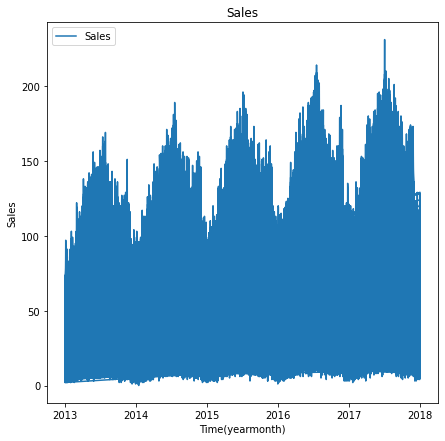

In [117]:
df1.index=df1['date']
ts=df1['sales']
plt.figure(figsize=(7,7))
plt.plot(ts,label='Sales')
plt.title('Sales')
plt.xlabel('Time(yearmonth)')
plt.ylabel('Sales')
plt.legend(loc='best')


To make visualation and to analyse still effectively we use bar chart here on years and sales

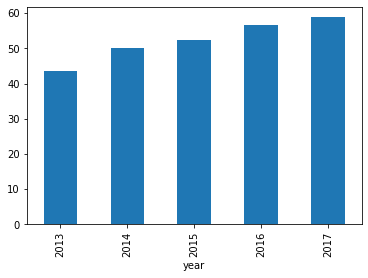

In [118]:
df1.groupby('year')['sales'].mean().plot.bar()

Now the next Hypothesis is verified

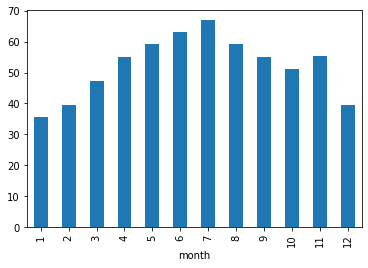

In [119]:
df1.groupby('month')['sales'].mean().plot.bar()

Now we plot a graph to analyse the month and year
we can observe a cyclic pattern 

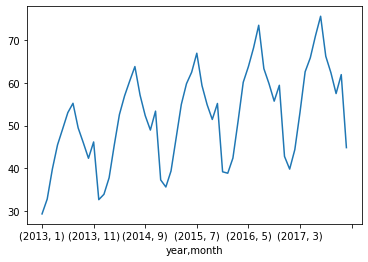

In [120]:
temp=df1.groupby(['year','month'])['sales'].mean()
temp.plot()

Next Hypothesis is observed

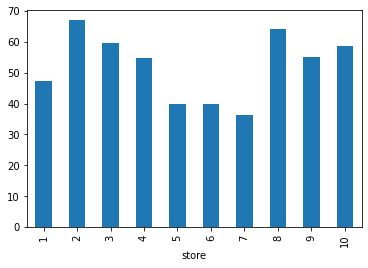

In [121]:
df1.groupby('store')['sales'].mean().plot.bar()

Next Hypothesis is verified

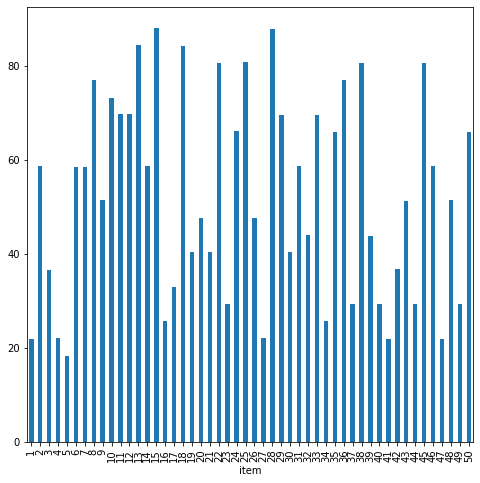

In [122]:
df1.groupby('item')['sales'].mean().plot.bar(figsize=(8,8))

In [123]:
df1['day of week'] = df1['date'].dt.dayofweek
temp=df1['date']
def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6 :
    return 1
  else:
    return 0
temp2=df1['date'].apply(applyer)  
df1['weekend']=temp2    

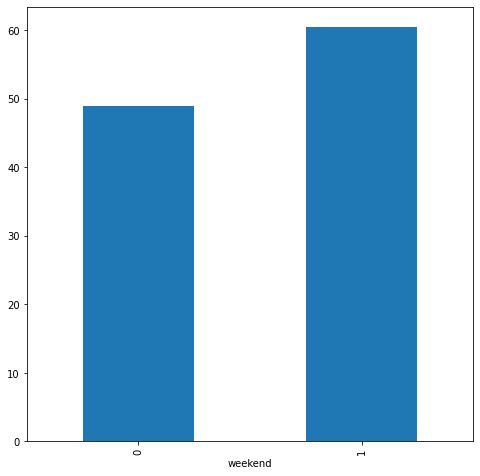

In [127]:
df1.groupby('weekend')['sales'].mean().plot.bar(figsize=(8,8))

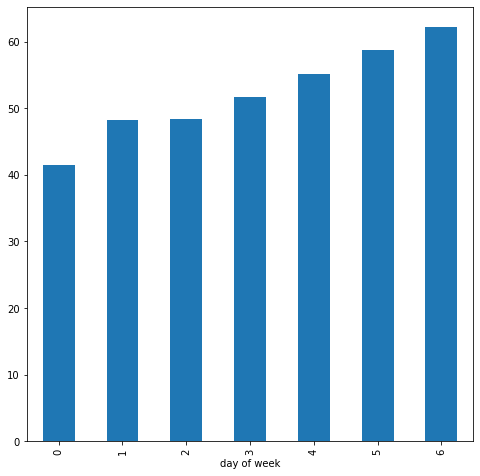

In [125]:
df1.groupby('day of week')['sales'].mean().plot.bar(figsize=(8,8))

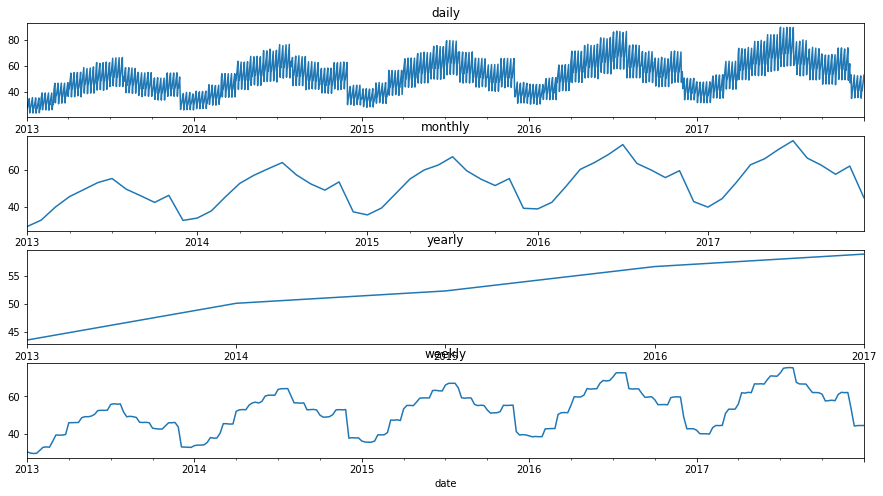

In [126]:
df1.Timestamp=pd.to_datetime(df1.date,format='%Y-%m-%d %H:%M')
df1.index=df1.Timestamp
daily=df1.resample('d').mean()
monthly=df1.resample('m').mean()
yearly=df1.resample('Y').mean()
Weekly=df1.resample('W').mean()
fig,ax=plt.subplots(4,1)
daily.sales.plot(figsize=(15,8),title='daily',ax=ax[0])
monthly.sales.plot(figsize=(15,8),title='monthly',ax=ax[1])
yearly.sales.plot(figsize=(15,8),title='yearly',ax=ax[2])
Weekly.sales.plot(figsize=(15,8),title='weekly',ax=ax[3])

